# ANN Classification Ruben Serdons (Loan Approval)

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('./Data/Loan.csv')

In [24]:
df.head(20)

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,45,39948,617,0,4,22,13152,48,1,2,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,38,39709,628,0,0,15,26045,48,2,1,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,47,40724,570,0,1,26,17627,36,1,2,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,58,69084,545,0,3,34,37898,96,2,1,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,37,103264,594,0,0,17,9184,36,1,1,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
5,37,178310,626,1,4,16,15433,72,1,0,...,14859.166667,0.756079,5,27071,0.217433,0.217601,385.577074,0.075211,1,44.0
6,58,51250,564,0,3,39,12741,48,1,0,...,4270.833333,0.884275,5,21730,0.225741,0.205271,391.300352,0.170529,0,50.0
7,49,97345,516,0,3,23,19634,12,0,5,...,8112.083333,0.933492,5,38621,0.226634,0.209113,1827.360055,0.260767,1,42.4
8,34,116841,603,0,1,12,55353,60,0,5,...,9736.750000,0.728397,3,7711,0.258853,0.291539,1762.199026,0.246509,0,61.0
9,46,40615,612,0,0,19,25443,12,1,4,...,3384.583333,0.615323,3,116812,0.184443,0.197271,2353.577424,0.903384,0,53.0


In [4]:
df.shape

(20000, 36)

In [5]:
df.dtypes

ApplicationDate                object
Age                             int64
AnnualIncome                    int64
CreditScore                     int64
EmploymentStatus               object
EducationLevel                 object
Experience                      int64
LoanAmount                      int64
LoanDuration                    int64
MaritalStatus                  object
NumberOfDependents              int64
HomeOwnershipStatus            object
MonthlyDebtPayments             int64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines         int64
NumberOfCreditInquiries         int64
DebtToIncomeRatio             float64
BankruptcyHistory               int64
LoanPurpose                    object
PreviousLoanDefaults            int64
PaymentHistory                  int64
LengthOfCreditHistory           int64
SavingsAccountBalance           int64
CheckingAccountBalance          int64
TotalAssets                     int64
TotalLiabilities                int64
MonthlyIncom

We're going to check for the columns who's type is **object** how many unique values it has, and what the unique values are

In [6]:
for column in df.columns:
    if str(df[column].dtype) == 'object':
        print('-------------------------')
        print(df[column].value_counts())
        print("Total different values: ", str(len(df[column].unique())))

-------------------------
ApplicationDate
2018-01-01    1
2054-07-01    1
2054-07-08    1
2054-07-07    1
2054-07-06    1
             ..
2036-04-02    1
2036-04-01    1
2036-03-31    1
2036-03-30    1
2072-10-03    1
Name: count, Length: 20000, dtype: int64
Total different values:  20000
-------------------------
EmploymentStatus
Employed         17036
Self-Employed     1573
Unemployed        1391
Name: count, dtype: int64
Total different values:  3
-------------------------
EducationLevel
Bachelor       6054
High School    5908
Associate      4034
Master         3050
Doctorate       954
Name: count, dtype: int64
Total different values:  5
-------------------------
MaritalStatus
Married     10041
Single       6078
Divorced     2882
Widowed       999
Name: count, dtype: int64
Total different values:  4
-------------------------
HomeOwnershipStatus
Mortgage    7939
Rent        6087
Own         3938
Other       2036
Name: count, dtype: int64
Total different values:  4
-------------------

In [7]:
df.drop('ApplicationDate', axis=1, inplace=True)

## Encoding

We have EmploymentStatus, EducationLevel, MaritalStatus, HomeOwnershipStatus and LoanPurposes that need to be encoded.

In [8]:
from sklearn.preprocessing import LabelEncoder

variables = ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus',
            'LoanPurpose']

encoder = LabelEncoder()

df[variables] = df[variables].apply(encoder.fit_transform)


In [9]:
df.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,45,39948,617,0,4,22,13152,48,1,2,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,38,39709,628,0,0,15,26045,48,2,1,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,47,40724,570,0,1,26,17627,36,1,2,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,58,69084,545,0,3,34,37898,96,2,1,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,37,103264,594,0,0,17,9184,36,1,1,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


## X and y-variables

In [10]:
X = df.drop('LoanApproved', axis=1)

y_temp = df['LoanApproved']

y = tf.keras.utils.to_categorical(y_temp)

## train/val/test - split

In [11]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.35)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

## Create neural network

In [12]:
model = keras.Sequential(
    [
        layers.Dense(16, activation="relu", input_shape=(len(X.columns),)),
        layers.Dense(8, activation="relu"),
        layers.Dense(len(df['LoanApproved'].unique()), activation="softmax")
    ]
)

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\ruben\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 714 (2.79 KB)

 Trainable params: 714 (2.79 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_val, y_val))

Epoch 1/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6849 - loss: 2391.1658 - val_accuracy: 0.8320 - val_loss: 192.7830
Epoch 2/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.8399 - loss: 118.7082 - val_accuracy: 0.8020 - val_loss: 141.0713
Epoch 3/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - accuracy: 0.8487 - loss: 70.3072 - val_accuracy: 0.8657 - val_loss: 53.0051
Epoch 4/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.8427 - loss: 82.4561 - val_accuracy: 0.8680 - val_loss: 52.9359
Epoch 5/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.8498 - loss: 72.1801 - val_accuracy: 0.8514 - val_loss: 48.1919
Epoch 6/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.8541 - loss: 46.4587 - val_accuracy: 0.8329 - val_loss: 67.0859
Epoch 7/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 0.8526 - loss: 42.1263 - val_accuracy: 0.8637 - val_loss: 38.2653
Epoch 8/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - accuracy:

Epoch 50/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.8757 - loss: 4.6389 - val_accuracy: 0.8963 - val_loss: 2.2020
Epoch 51/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.8813 - loss: 4.4521 - val_accuracy: 0.8991 - val_loss: 2.5673
Epoch 52/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.8762 - loss: 4.1726 - val_accuracy: 0.8954 - val_loss: 3.3128
Epoch 53/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.8816 - loss: 3.9333 - val_accuracy: 0.8769 - val_loss: 4.3935
Epoch 54/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.8905 - loss: 3.0403 - val_accuracy: 0.9011 - val_loss: 2.1914
Epoch 55/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.8814 - loss: 3.1529 - val_accuracy: 0.8286 - val_loss: 4.2080
Epoch 56/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.8609 - loss: 4.2004 - val_accuracy: 0.8877 - val_loss: 3.7300
Epoch 57/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.8803 -

407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.8884 - loss: 0.3562 - val_accuracy: 0.9060 - val_loss: 0.3142
Epoch 100/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.8781 - loss: 0.4133 - val_accuracy: 0.8960 - val_loss: 0.3484
Epoch 101/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.8961 - loss: 0.2670 - val_accuracy: 0.8466 - val_loss: 0.8220
Epoch 102/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.8713 - loss: 0.4860 - val_accuracy: 0.8389 - val_loss: 0.5600
Epoch 103/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.8729 - loss: 0.6302 - val_accuracy: 0.9060 - val_loss: 0.3197
Epoch 104/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.8866 - loss: 0.3721 - val_accuracy: 0.8620 - val_loss: 0.5912
Epoch 105/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.8831 - loss: 0.3373 - val_accuracy: 0.9066 - val_loss: 0.2769
Epoch 106/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.8895 - loss:

407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.9033 - loss: 0.2253 - val_accuracy: 0.7529 - val_loss: 2.4756
Epoch 149/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.7652 - loss: 1.0287 - val_accuracy: 0.7529 - val_loss: 0.6210
Epoch 150/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.7642 - loss: 0.4472 - val_accuracy: 0.7529 - val_loss: 0.5087
Epoch 151/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.7611 - loss: 0.3416 - val_accuracy: 0.7529 - val_loss: 0.3440
Epoch 152/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.8537 - loss: 0.3141 - val_accuracy: 0.8834 - val_loss: 0.3111
Epoch 153/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.8982 - loss: 0.2698 - val_accuracy: 0.8246 - val_loss: 0.3530
Epoch 154/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.8784 - loss: 0.2836 - val_accuracy: 0.8377 - val_loss: 0.3548
Epoch 155/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.9006 - loss:

407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.9202 - loss: 0.1957 - val_accuracy: 0.8514 - val_loss: 0.3267
Epoch 198/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.9150 - loss: 0.1976 - val_accuracy: 0.9337 - val_loss: 0.4093
Epoch 199/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - accuracy: 0.9174 - loss: 0.2052 - val_accuracy: 0.8954 - val_loss: 0.2715
Epoch 200/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.9133 - loss: 0.2181 - val_accuracy: 0.9346 - val_loss: 0.2196
Epoch 201/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.9229 - loss: 0.1932 - val_accuracy: 0.9180 - val_loss: 0.4860
Epoch 202/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.9239 - loss: 0.2028 - val_accuracy: 0.9083 - val_loss: 0.2463
Epoch 203/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.9290 - loss: 0.1803 - val_accuracy: 0.9411 - val_loss: 0.1828
Epoch 204/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.9229 - loss:

407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.9246 - loss: 0.1851 - val_accuracy: 0.9314 - val_loss: 0.2780
Epoch 247/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.9250 - loss: 0.1955 - val_accuracy: 0.9263 - val_loss: 0.2981
Epoch 248/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.9288 - loss: 0.1831 - val_accuracy: 0.9066 - val_loss: 0.3307
Epoch 249/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.9260 - loss: 0.1956 - val_accuracy: 0.9071 - val_loss: 0.4560
Epoch 250/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.9304 - loss: 0.1844 - val_accuracy: 0.9311 - val_loss: 0.2763
Epoch 251/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.9327 - loss: 0.1720 - val_accuracy: 0.9320 - val_loss: 0.2757
Epoch 252/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.9242 - loss: 0.1912 - val_accuracy: 0.9506 - val_loss: 0.2638
Epoch 253/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.9269 - loss:

407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.9458 - loss: 0.1414 - val_accuracy: 0.9466 - val_loss: 0.2995
Epoch 296/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.9356 - loss: 0.1629 - val_accuracy: 0.9377 - val_loss: 0.2323
Epoch 297/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.9369 - loss: 0.1583 - val_accuracy: 0.9517 - val_loss: 0.2948
Epoch 298/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.9332 - loss: 0.1691 - val_accuracy: 0.9460 - val_loss: 0.2784
Epoch 299/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.9359 - loss: 0.1622 - val_accuracy: 0.9483 - val_loss: 0.3076
Epoch 300/300
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.8752 - loss: 0.4643 - val_accuracy: 0.9114 - val_loss: 0.3906


<AxesSubplot:>

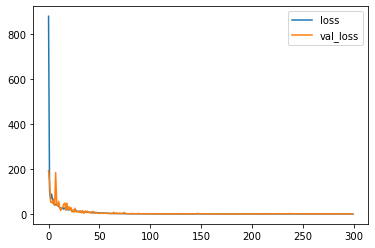

In [14]:
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot()

<AxesSubplot:>

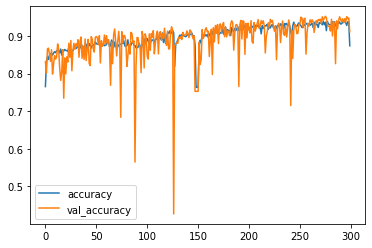

In [15]:
loss_df[['accuracy', 'val_accuracy']].plot()


In [16]:
# compare the final model loss/accuracy/evaluation values
# the values should again match mostly
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
[0.19897983968257904, 0.9231428503990173]

Train data evaluation:
[0.19870421290397644, 0.9192307591438293]


In [17]:
# get predictions and convert with argmax() to get categories 
# instead of raw probabilities
test_predictions = model.predict(X_test)
test_predictions = np.argmax(test_predictions, axis=1)

# convert also y-test -values with argmax
y_test = np.argmax(y_test, axis=1)

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step


<AxesSubplot:>

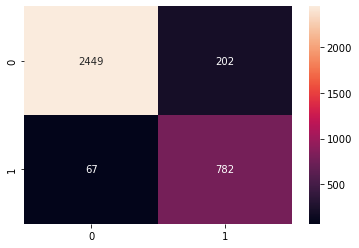

In [18]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g')

In [19]:
# print the classification report based on true values and predictions
print(classification_report(y_test, test_predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      2651
           1       0.79      0.92      0.85       849

    accuracy                           0.92      3500
   macro avg       0.88      0.92      0.90      3500
weighted avg       0.93      0.92      0.92      3500


Model overall accuracy: 92.31%


In [20]:
# The AUC score is a super sensitive metric
# you often get low scores, even 0.5

# in binary classification, AUC values are often interpreted as follows:
# A binary classifier is useful only when it achieves ROC-AUC score greater than 0.5 and as near to 1 as possible. 
# If a classifier yields a score less than 0.5, it simply means that the model is performing worse 
# than a random classifier, and therefore is useless.

# In multi category classification , AUC values are often interpreted as follows: 
# 0.5-0.6 (failed)
# 0.6-0.7 (worthless)
# 0.7-0.8 (poor)
# 0.8-0.9 (good)
# > 0.9 (excellent)

# get ROC-AUC -score
roc_auc_score(y, model.predict(X), multi_class="ovr")

625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step


0.9683863413313247

In [41]:
df['RiskScore'].head(10)

0    49.0
1    52.0
2    52.0
3    54.0
4    36.0
5    44.0
6    50.0
7    42.4
8    61.0
9    53.0
Name: RiskScore, dtype: float64

In [23]:
df['CreditScore'].min()

343

In [51]:
tester_row = {
     'Age': 45,                        # Mid-career individual with stable income
    'AnnualIncome': 180000,            # High annual income
    'CreditScore': 820,                # Excellent credit score
    'EmploymentStatus': 1,             # Employed (assuming 1 represents employment)
    'EducationLevel': 3,               # Higher education (Master's or PhD level)
    'Experience': 20,                  # 20 years of work experience
    'LoanAmount': 20000,               # Moderate loan amount
    'LoanDuration': 36,                # Loan duration of 3 years
    'MaritalStatus': 1,                # Married (usually indicates stability)
    'NumberOfDependents': 1,           # 1 dependent, moderate family size
    'HomeOwnershipStatus': 1,          # Owns a home
    'MonthlyDebtPayments': 500,        # Low monthly debt payments
    'CreditCardUtilizationRate': 0.15, # Low credit card utilization rate
    'NumberOfOpenCreditLines': 5,      # 5 open credit lines, indicating manageable credit usage
    'NumberOfCreditInquiries': 1,      # Few recent credit inquiries
    'DebtToIncomeRatio': 0.1,          # Low debt-to-income ratio
    'BankruptcyHistory': 0,            # No bankruptcy history
    'LoanPurpose': 1,                  # Purpose such as home improvement or education (lower risk)
    'PreviousLoanDefaults': 0,         # No previous loan defaults
    'PaymentHistory': 48,              # Long and positive payment history
    'LengthOfCreditHistory': 20,       # Lengthy credit history, indicating financial maturity
    'SavingsAccountBalance': 100000,   # Substantial savings account balance
    'CheckingAccountBalance': 5000,    # Decent checking account balance
    'TotalAssets': 1500000,            # Substantial total assets
    'TotalLiabilities': 100000,        # Low total liabilities
    'MonthlyIncome': 15000,            # High monthly income
    'UtilityBillsPaymentHistory': 0.95,# Excellent utility bill payment history
    'JobTenure': 15,                   # Long tenure at current job
    'NetWorth': 1400000,               # High net worth
    'BaseInterestRate': 0.08,          # Low base interest rate
    'InterestRate': 0.10,              # Low overall interest rate
    'MonthlyLoanPayment': 600,         # Moderate monthly loan payment
    'TotalDebtToIncomeRatio': 0.05,    # Very low debt-to-income ratio
    'RiskScore': 0.05                  # Very low risk score
}

tester_row = pd.DataFrame([tester_row])
result = model.predict(tester_row)[0]
# result_text = categories[np.argmax(result)]
print(f"the result is {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
the result is [0.0858503 0.9141497]


In [52]:
print(result)

[0.0858503 0.9141497]


In [ ]:
# Does this mean that there is a 8.59% probability that the loan will be rejected
# and a 91.4% probability that it will be approved?